<a href="https://colab.research.google.com/github/plaban1981/Feature-Engineering-for-Machine-Learning/blob/master/Numerical_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#### What is a Variable?
A variable is any characteristic, number, or quantity that can be measured or counted. The following are examples of variables:

- Age (21, 35, 62, ...)
- Gender (male, female)
- Income (GBP 20000, GBP 35000, GBP 45000, ...)
- House price (GBP 350000, GBP 570000, ...)
- Country of birth (China, Russia, Costa Rica, ...)
- Eye colour (brown, green, blue, ...)
- Vehicle make (Ford, Volkswagen, ...)


They are called 'variables' because the value they take may vary (and it usually does) in a population.

#### Most variables in a data set can be classified into one of two major types:

- Numerical variables
- Categorical variables

##Numerical variables
The values of a numerical variable are numbers. They can be further classified into 

- discrete variables and 
- continuous variables.

#### Discrete numerical variable
A variable which values are whole numbers (counts) is called discrete. 

For example, the number of items bought by a customer in a supermarket is discrete. The customer can buy 1, 25, or 50 items, but not 3.7 items. It is always a round number. 

The following are examples of discrete variables:

- Number of active bank accounts of a borrower (1, 4, 7, ...)
- Number of pets in the family
- Number of children in the family

#### Continuous numerical variable
A variable that may contain any value within some range is called continuous. 

For example, the total amount paid by a customer in a supermarket is continuous. 

The customer can pay, GBP 20.5, GBP 13.10, GBP 83.20 and so on. Other examples of continuous variables are:

- House price (in principle, it can take any value) (GBP 350000, 57000, 1000000, ...)
- Time spent surfing a website (3.4 seconds, 5.10 seconds, ...)
- Total debt as percentage of total income in the last month (0.2, 0.001, 0, 0.75, ...)

## Real Life example: Peer to peer lending (Finance)
#### Lending Club

Lending Club is a peer-to-peer Lending company based in the US. They match people looking to invest money with people looking to borrow money. When investors invest their money through Lending Club, this money is passed onto borrowers, and when borrowers pay their loans back, the capital plus the interest passes on back to the investors. It is a win for everybody as they can get typically lower loan rates and higher investor returns.

If you want to learn more about Lending Club follow this link.

The Lending Club dataset contains complete loan data for all loans issued through 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. Features include credit scores, number of finance inquiries, address including zip codes and state, and collections among others. Collections indicates whether the customer has missed one or more payments and the team is trying to recover their money.

The file is a matrix of about 890 thousand observations and 75 variables. More detail on this dataset can be found in Kaggle's website

Let's go ahead and have a look at the variables!

====================================================================================================

#### To download the Lending Club loan book from Kaggle go to this website

Scroll down to the bottom of the page, and click on the link 'loan.csv', and then click the 'download' blue button towards the right of the screen, to download the dataset. Unzip it, and save it to a directory of your choice.

Note that you need to be logged in to Kaggle in order to download the datasets.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## let's load the dataset with just a few columns and a few rows to speed things up

In [21]:
use_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'open_acc', 'loan_status','open_il_12m']
data = pd.read_csv('loan.csv', usecols=use_cols)  # set a seed for reproducibility
data.head()

,loan_amnt,int_rate,annual_inc,loan_status,open_acc,open_il_12m
0,2500,13.56,55000.0,Current,9.0,1.0
1,30000,18.94,90000.0,Current,13.0,2.0
2,5000,17.97,59280.0,Current,8.0,0.0
3,4000,18.94,92000.0,Current,10.0,3.0
4,30000,16.14,57250.0,Current,12.0,3.0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789278 entries, 0 to 789277
Data columns (total 6 columns):
loan_amnt      789278 non-null int64
int_rate       789278 non-null float64
annual_inc     789277 non-null float64
loan_status    789277 non-null object
open_acc       789277 non-null float64
open_il_12m    789277 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 36.1+ MB


In [23]:
data.shape

(789278, 6)

##Continuous Variables

In [24]:
# let's look at the values of the variable loan_amnt
# this is the amount of money requested by the borrower
# in US dollars

data['loan_amnt'].unique()

array([ 2500, 30000,  5000, ..., 36075, 36100,  2025])

Text(0, 0.5, 'Number of Loans')

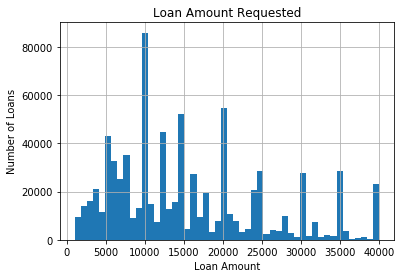

In [25]:
# let's make an histogram to get familiar with the
# distribution of the variable
data['loan_amnt'].hist(bins=50)
plt.title('Loan Amount Requested')
plt.xlabel('Loan Amount')
plt.ylabel('Number of Loans')


The values of the variable vary across the entire range of the variable. This is characteristic of continuous variables.

The taller bars correspond to loan sizes of 10000, 15000, 20000, and 35000. There are more loans disbursed for those loan amount values. This indicates that most people tend to ask for these loan amounts. Likely, these particular loan amounts are pre-determined and offered as such in the Lending Club website.

Less frequent loan values, like 23,000 or 33,000 could be requested by people who require a specific amount of money for a definite purpose.

Text(0, 0.5, 'Number of Loans')

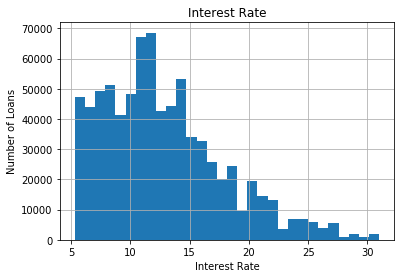

In [26]:
data['int_rate'].hist(bins=30)
plt.title('Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Number of Loans')

#### Again, we see that the values of the variable vary continuously across the variable range.



Text(0, 0.5, 'Number of Customers')

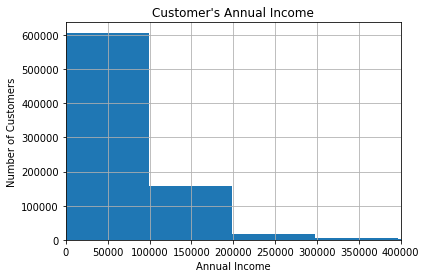

In [27]:
# and now,let's explore the income declared by the customers,
# that is, how much they earn yearly.

fig = data.annual_inc.hist(bins=100)
fig.set_xlim(0, 400000)
fig.set_title("Customer's Annual Income")
fig.set_xlabel('Annual Income')
fig.set_ylabel('Number of Customers')


The majority of salaries are concentrated towards values in the range 30-70 k, with only a few customers earning higher salaries. Again, the values of the variable, vary continuosly across the variable range.

## Discrete Variables

In [28]:
data.isnull().sum()[data.isnull().sum() > 0]

annual_inc     1
loan_status    1
open_acc       1
open_il_12m    1
dtype: int64

In [29]:
data.open_acc.dropna().unique()

array([  9.,  13.,   8.,  10.,  12.,  18.,   1.,  19.,  38.,   6.,  20.,
        27.,   7.,   4.,  14.,  17.,   5.,  11.,   3.,  16.,  15.,  24.,
        23.,  26.,  22.,  21.,  25.,  29.,   2.,  44.,  28.,  31.,  34.,
        32.,  30.,  35.,  41.,  36.,  40.,  33.,  45.,  43.,  37.,  59.,
        39.,   0.,  55.,  48.,  60.,  47.,  42.,  51.,  66.,  49.,  53.,
        57.,  50.,  46.,  54.,  61.,  63.,  68.,  52.,  64.,  62.,  69.,
        94.,  70.,  58.,  78.,  56.,  82., 101.,  86.,  65.,  72.,  80.,
        77.,  81.,  71.])

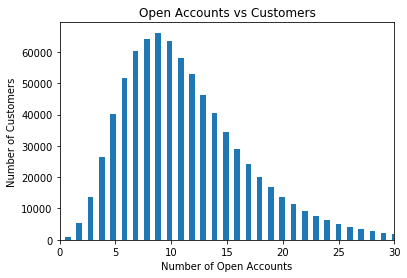

In [32]:
# let's make an histogram to get familiar with the
# distribution of the variable
data.open_acc.plot.hist(bins=200)
plt.xlabel('Number of Open Accounts')
plt.ylabel('Number of Customers')
plt.title('Open Accounts vs Customers')
plt.xlim(0, 30)
plt.show()

#### Histograms of discrete variables have this typical broken shape, as not all the values within the variable range are present in the variable.

**Number of installment accounts opened in past 12 months (open_il_12m in the dataset)**. 

Installment accounts are those that at the moment of acquiring them, there is a set period and amount of repayments agreed between the lender and borrower. An example of this is a car loan, or a student loan. The borrower knows that they are going to pay a certain, fixed amount over for example 36 months.

In [33]:
data.open_il_12m.unique()

array([ 1.,  2.,  0.,  3.,  5.,  4.,  6.,  8.,  7., 10.,  9., 11., 12.,
       13., 20., 21., 25., 15., 14., nan])

[]

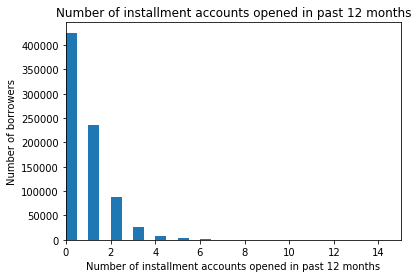

In [35]:
data.open_il_12m.plot.hist(bins=50)
plt.title('Number of installment accounts opened in past 12 months')
plt.xlabel('Number of installment accounts opened in past 12 months')
plt.ylabel('Number of borrowers')
plt.xlim(0,15)
plt.plot()

####The majority of the borrowers have none or 1 installment account, with only a few borrowers having more than 2.

##A variation of discrete variables: the binary variable

#### Binary variables, are discrete variables, that can take only 2 values, therefore binary.

In the next cells I will create an additional variable, called defaulted, to capture the number of loans that have defaulted. A defaulted loan is a loan that a customer has failed to re-pay and the money is lost.

The variable takes the values 0 where the loans are ok and being re-paid regularly, or 1, when the borrower has confirmed that will not be able to re-pay the borrowed amount.

In [36]:
data.loan_status.unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default', nan], dtype=object)

In [0]:
# let's create one additional variable called defaulted.
# This variable indicates if the loan has defaulted, which means,
# if the borrower failed to re-pay the loan, and the money
# is deemed lost.

data['Defaulted'] = np.where(data['loan_status'].isin(['Default']),1,0)

In [38]:
data['Defaulted'].mean()

2.027169134322761e-05

In [39]:
data.head()

,loan_amnt,int_rate,annual_inc,loan_status,open_acc,open_il_12m,Defaulted
0,2500,13.56,55000.0,Current,9.0,1.0,0
1,30000,18.94,90000.0,Current,13.0,2.0,0
2,5000,17.97,59280.0,Current,8.0,0.0,0
3,4000,18.94,92000.0,Current,10.0,3.0,0
4,30000,16.14,57250.0,Current,12.0,3.0,0


In [40]:
# the new variable takes the value 1 for loans that
# are defaulted

data[data['loan_status'] == 'Default'].head()

,loan_amnt,int_rate,annual_inc,loan_status,open_acc,open_il_12m,Defaulted
220496,7500,12.73,50000.0,Default,4.0,1.0,1
220980,30000,20.89,109000.0,Default,12.0,1.0,1
260870,1000,17.47,56160.0,Default,4.0,0.0,1
338482,35000,10.90,30000.0,Default,3.0,0.0,1
347594,22000,24.84,62000.0,Default,16.0,2.0,1


In [41]:
# A binary variable, can take 2 values. For example,
# the variable defaulted that we just created:
# either the loan is defaulted (1) or not (0)

data.Defaulted.unique()

array([0, 1])

(0, 2)

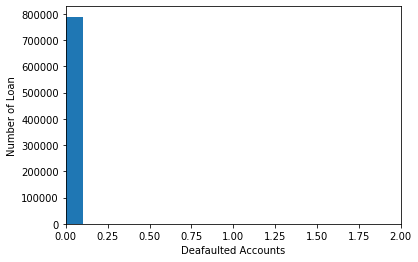

In [45]:
data.Defaulted.plot.hist()
plt.xlabel('Deafaulted Accounts')
plt.ylabel('Number of Loan')
plt.xlim(0,2)

#### As we can see, the variable shows only 2 values, 0 and 1, and the majority of the loans are ok.